In [ ]:
### **DATA ANALYSIS PYTHON PROJECT--  BLINKIT ANALYSIS**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns


blinkit = pd.read_csv("blinkit_data.csv")
blinkit
 


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


### **SIZE OF DATA**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns


blinkit = pd.read_csv("blinkit_data.csv")

 


In [54]:
print('the size of data is:',blinkit.shape)

the size of data is: (8523, 12)


### **FIELD INFO**

In [55]:
blinkit.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [56]:
blinkit.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **DATA CLEANING**

In [57]:
blinkit['Item Fat Content'].unique()


array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [58]:
blinkit['Item Fat Content']=blinkit['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [59]:
blinkit['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### **BUSINESS REQUIREMENT**

### **KPI's REQUIREMENT**

In [60]:

#TOTAL sale

total_sale=blinkit['Sales'].sum()

#Average SALE
average_sale=blinkit['Sales'].mean()

#No of items sold

No_of_items_sold=blinkit['Sales'].count()

#average rating

average_rating=blinkit['Rating'].mean()


print('Total Sale : ',total_sale)
print('Average Sale : ',average_sale)
print('Total item sold : ',No_of_items_sold)
print('Average rating : ',average_rating)


Total Sale :  1201681.4808
Average Sale :  140.9927819781767
Total item sold :  8523
Average rating :  3.965857092573038


### **Chart Requirement**

### **Total Sale By Fat Content**

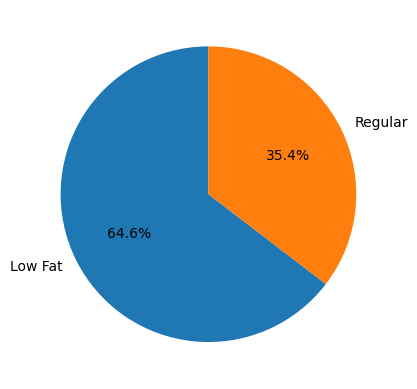

In [61]:
sales_by_fat=blinkit.groupby('Item Fat Content')["Sales"].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,startangle=90,autopct='%.1f%%')
plt.show()

### **Total Sale By Item Type**

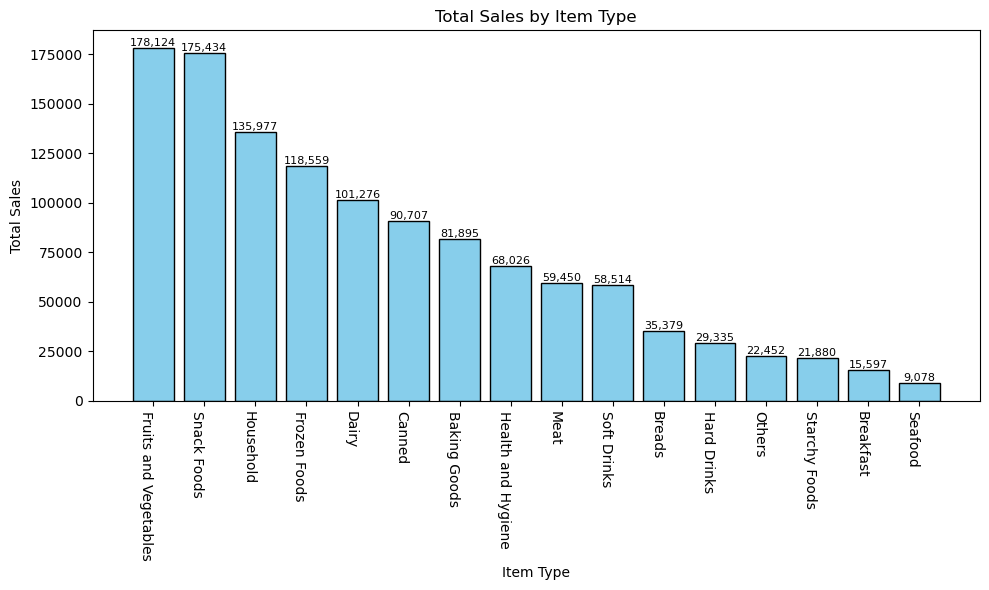

In [68]:


sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values, color='skyblue',edgecolor='black')

plt.xticks(rotation=-90, ha='right')
plt.xlabel('Item Type',)
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():,.0f}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### **Fat content by outlet for total sale**

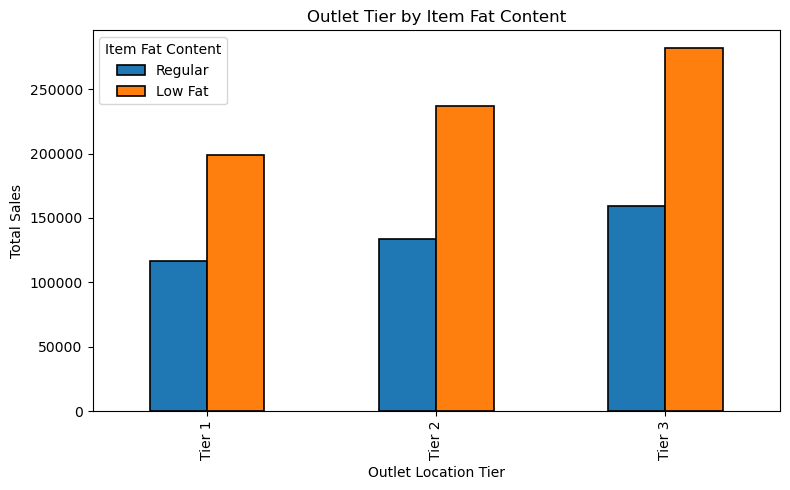

In [71]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(
    kind='bar',
    figsize=(8, 5),
    title='Outlet Tier by Item Fat Content',
    edgecolor='black',    # bar outline
    linewidth=1.2         # outline thickness
)

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()



### **TOTAL SALE BY OUTLET ESTABLISHMENT**

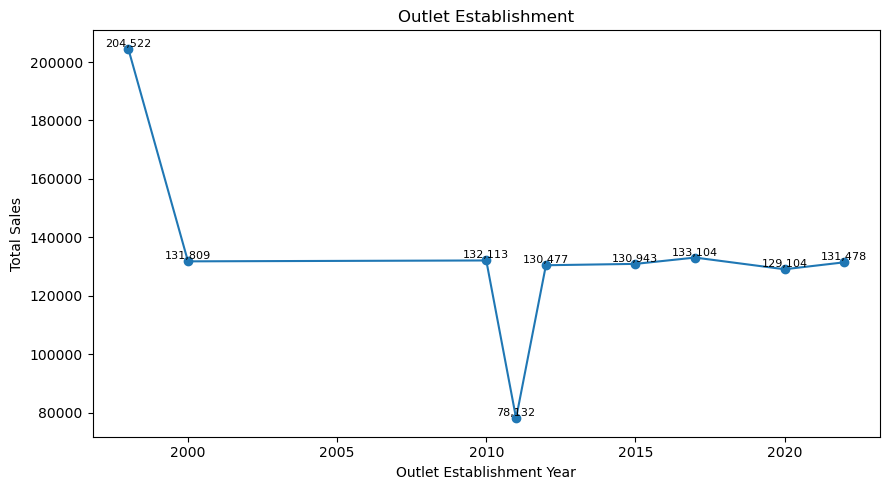

In [72]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### **SALES BY OUTLET SIZE**

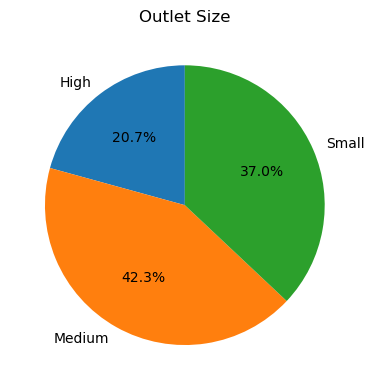

In [75]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()
